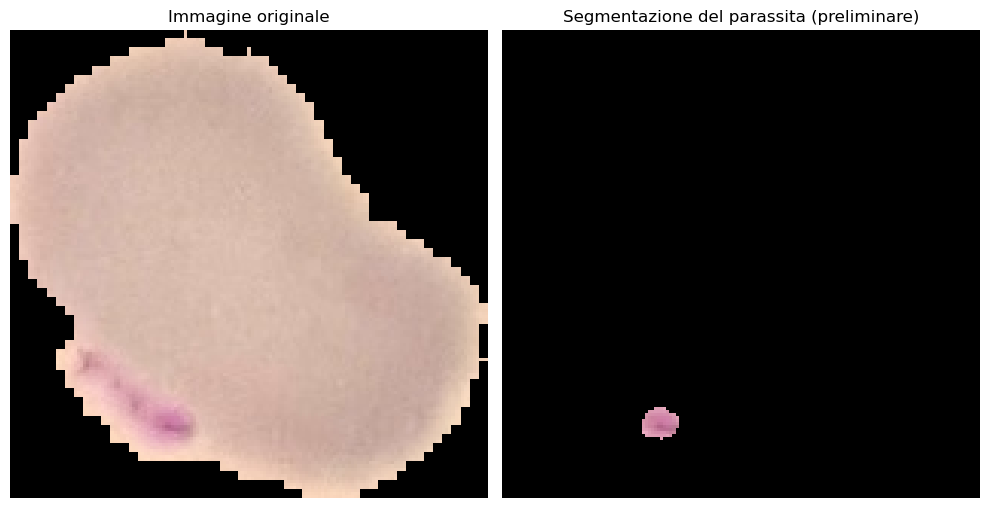

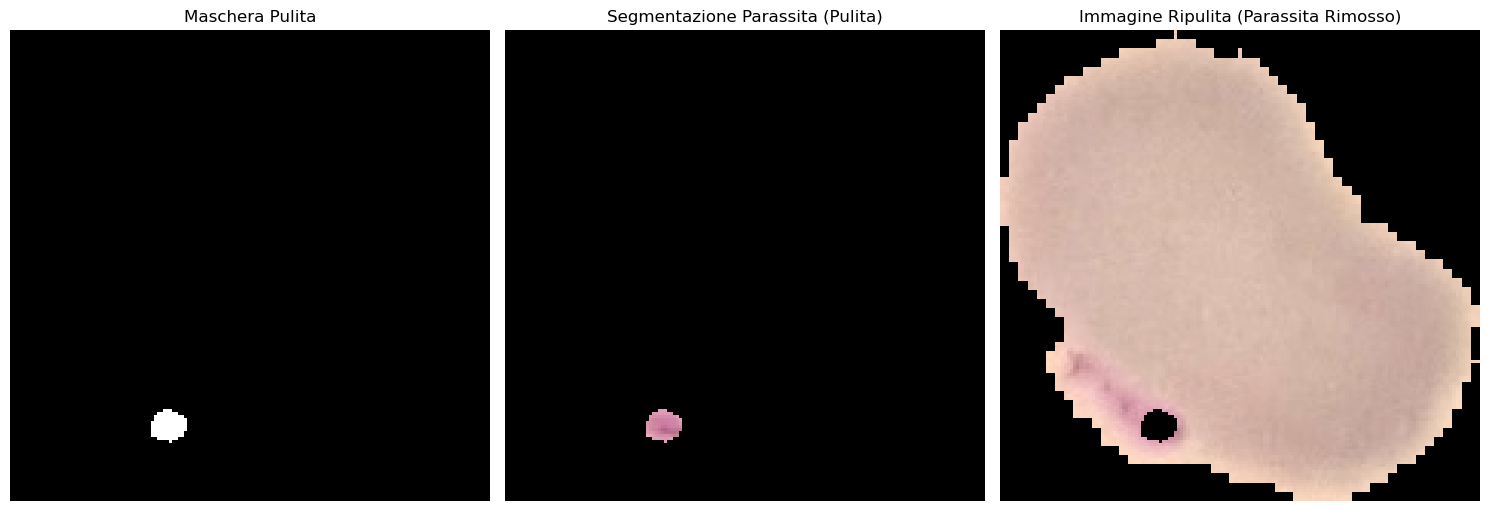

In [60]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Caricamento dell'immagine
img_path = 'FESI/Progetto/malaria/malaria/parasite (4).png'
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Visualizzazione dell'immagine originale per riferimento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Immagine originale")
plt.imshow(image_rgb)
plt.axis("off")

# Segmentazione preliminare: maschera del parassita (usando HSV)
# Range per il viola (parassita)
lower_hsv = np.array([90, 50, 50])  # Tonalità viola minimo
upper_hsv = np.array([170, 255, 255])  # Tonalità viola massimo
mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)

# Applicazione della maschera
segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Visualizzazione del risultato della segmentazione
plt.subplot(1, 2, 2)
plt.title("Segmentazione del parassita (preliminare)")
plt.imshow(segmented)
plt.axis("off")
plt.tight_layout()
plt.show()

# Post-elaborazione della maschera per rimuovere artefatti
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Operazioni morfologiche: apertura per rimuovere rumore
mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Riempire i buchi interni nelle aree segmentate (opzionale, se necessario)
mask_filled = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

# Rimozione del parassita dall'immagine originale
image_cleaned = cv2.bitwise_and(image_rgb, image_rgb, mask=cv2.bitwise_not(mask_filled))

# Visualizzazione del processo
plt.figure(figsize=(15, 10))

# Maschera pulita
plt.subplot(1, 3, 1)
plt.title("Maschera Pulita")
plt.imshow(mask_filled, cmap="gray")
plt.axis("off")

# Immagine segmentata
plt.subplot(1, 3, 2)
plt.title("Segmentazione Parassita (Pulita)")
segmented_cleaned = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_filled)
plt.imshow(segmented_cleaned)
plt.axis("off")

# Immagine "ripulita" (senza parassita)
plt.subplot(1, 3, 3)
plt.title("Immagine Ripulita (Parassita Rimosso)")
plt.imshow(image_cleaned)
plt.axis("off")

plt.tight_layout()
plt.show()
